# Notes on Zipfs Law

Zipf's law was on the frontpage of HN again[0], and quite a few commentors talked about random words, and if they follow Zipfs law / power distribution.

Now a days there is easy access to large corpora of texts and machines can easily chew through megabytes of texts, so it is quite easy to try out Zipfs law on your own.

- [0] https://news.ycombinator.com/item?id=31636422#31637948

In [33]:
import urllib, re, random
from collections import Counter
from matplotlib import pyplot as plt

In [131]:
def loglog_corpus(corpus, title=None):
    counts = [el[1] for el in corpus.most_common()]
    plt.loglog(counts, '.')
    plt.ylabel("token count")
    plt.xlabel("Rank")
    if title:
        plt.title(title)

In [137]:
def corpus_stats(counter):
    tokens = sum(counter.values())
    words = len(counter)
    print("Total tokens:      {:8,}".format(tokens))
    print("Total words:       {:8,}".format(words))
    print("token/word ratio : {:11.2f} %".format(words/tokens*100))

## Real world corpora

In [114]:
corpora_url = [
    ("https://www.gutenberg.org/files/11/11-0.txt", "Alice in Wonderlands"),
    ("https://www.gutenberg.org/files/1342/1342-0.txt", "Pride and Prejudice"),
    ("https://www.gutenberg.org/files/2701/2701-0.txt", "Moby-Dick"),
    ("https://www.gutenberg.org/files/2600/2600-0.txt", "War & Peace"),
]
corpora = {name: Counter(re.sub(r'[^a-z ]', '', urllib.request.urlopen(url).read().decode('utf-8').lower()).split()) 
           for url, name in corpora_url}

Alice in Wonderlands
Total tokens:        26,804
Total words:          5,200
token/word ratio :       19.40 %

Pride and Prejudice
Total tokens:       124,242
Total words:          7,249
token/word ratio :        5.83 %

Moby-Dick
Total tokens:       196,685
Total words:         33,142
token/word ratio :       16.85 %

War & Peace
Total tokens:       514,216
Total words:         54,616
token/word ratio :       10.62 %



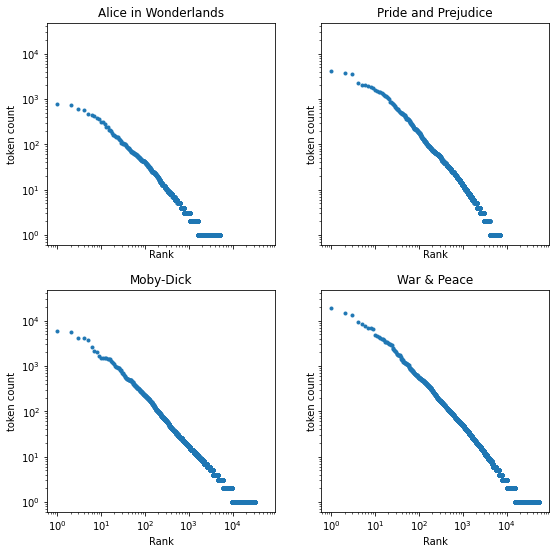

In [138]:
fig, axs = plt.subplots(2, 2, figsize=(9, 9), sharey=True, sharex=True)
for i, (n, c) in enumerate(corpora.items(), start=1):
    print(n)
    corpus_stats(c)
    print()
    plt.subplot(2, 2, i)
    loglog_corpus(c, n)


Total tokens:       861,947
Total words:         80,575
token/word ratio :        9.35 %


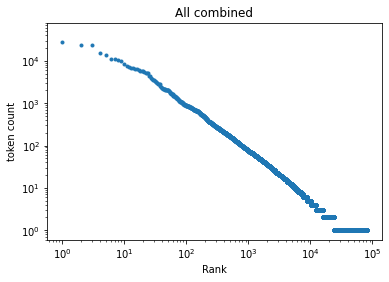

In [139]:
corpus = sum(corpora.values(), Counter())
corpus_stats(corpus)
loglog_corpus(corpus, "All combined")

## Randomly generated corpus

> As a final remark on Zipf’s law, we note that there is a debate on how surprising and interesting Zipf’s law and ‘power laws’ in general are as a description of natural phenomena. It has been argued that randomly generated text exhibits Zipf’s law (Li 1992).

>To show this, we construct a generator that randomly characters from the 26 letters of the alphabet and the blank (that is, each of these 27 symbols has an equal chance of being generated next). Simplifying slightly, the probability of a word of length n being generated is the probability of generating a non-blank character n times and the blank after that. One can show that the words generated by such a generator obey a power law of the form Mandelbrot suggested. 

*Chris Manning, et. al. "Foundation of Statistical Natural Language Processing" (MIT-1999)*

In [143]:
corpus = Counter(''.join(["qwertyuiopasdfghjklzxcvbnm "[random.randint(0,26)] for i in range(250_00_000)]).split()[:-1])

corpus_stats(corpus)

Total tokens:       891,786
Total words:        810,480
token/word ratio :       90.88 %


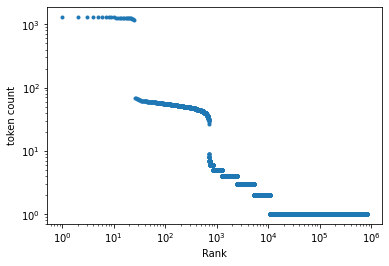

In [144]:
loglog_corpus(corpus)

### Looking at counts of word lengths instead of counts of words

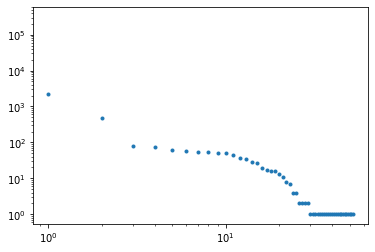

In [42]:
corpus = Counter(corpus.values())
loglog_corpus(corpus)